In [53]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Load the dataset
data = pd.read_csv("Sample_data.csv")
data.head()

,Student ID,school,Gender,April_MT,May_MT,June_MT,July_MT,August_MT,September_MT
0,A0001,A,Girl,5,6,6,0,11,11
1,A0002,A,Girl,5,5,6,9,11,11
2,A0003,A,Girl,7,8,10,12,13,12
3,A0004,A,Girl,15,14,15,14,14,14
4,A0005,A,Girl,6,10,10,11,13,13


# Data Cleaning and Preparation

In [4]:
# Check for shape of the data
data.shape

(397, 9)

In [5]:
# Check for data type
data.dtypes

Student ID      object
school          object
Gender          object
April_MT         int64
May_MT           int64
June_MT          int64
July_MT          int64
August_MT        int64
September_MT     int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Student ID    397 non-null    object
 1   school        397 non-null    object
 2   Gender        397 non-null    object
 3   April_MT      397 non-null    int64 
 4   May_MT        397 non-null    int64 
 5   June_MT       397 non-null    int64 
 6   July_MT       397 non-null    int64 
 7   August_MT     397 non-null    int64 
 8   September_MT  397 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 28.0+ KB


In [7]:
# Check for duplicate values
data.duplicated().sum()

0

In [8]:
# Check for missing values
data.isnull().sum()

Student ID      0
school          0
Gender          0
April_MT        0
May_MT          0
June_MT         0
July_MT         0
August_MT       0
September_MT    0
dtype: int64

In [9]:
# Check for missing values
data.isna().sum()

Student ID      0
school          0
Gender          0
April_MT        0
May_MT          0
June_MT         0
July_MT         0
August_MT       0
September_MT    0
dtype: int64

In [10]:
# Check for number of unique values
data.nunique()

Student ID      397
school           10
Gender            2
April_MT         17
May_MT           17
June_MT          18
July_MT          13
August_MT        14
September_MT     17
dtype: int64

# Calculate Statistical Measures

In [11]:
# Calculate summary statistics for each month
monthly_summary = data.iloc[:, 3:].describe()
monthly_summary

,April_MT,May_MT,June_MT,July_MT,August_MT,September_MT
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,10.881612,10.687657,10.377834,12.015113,12.045340,12.473552
std,3.333120,3.770322,4.604928,2.422490,2.420026,2.607764
min,3.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,8.000000,9.000000,8.000000,10.000000,10.000000,11.000000
50%,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000
75%,13.000000,13.000000,14.000000,14.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000,18.000000,19.000000,19.000000


In [12]:
# monthly averages for each student
data['Average_Score'] = data.iloc[:, 3:].mean(axis=1).round(2)
data.head()

,Student ID,school,Gender,April_MT,May_MT,June_MT,July_MT,August_MT,September_MT,Average_Score
0,A0001,A,Girl,5,6,6,0,11,11,6.50
1,A0002,A,Girl,5,5,6,9,11,11,7.83
2,A0003,A,Girl,7,8,10,12,13,12,10.33
3,A0004,A,Girl,15,14,15,14,14,14,14.33
4,A0005,A,Girl,6,10,10,11,13,13,10.50


In [42]:
# Summary Statistics
mean_progress = data['Progress_April_to_September'].mean()
median_progress = data['Progress_April_to_September'].median()
q1 = data['Progress_April_to_September'].quantile(0.25)
q3 = data['Progress_April_to_September'].quantile(0.75)

print(f"Mean Progress: {mean_progress}")
print(f"Median Progress: {median_progress}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")

Mean Progress: 1.5919395465994963
Median Progress: 2.0
Q1 (25th percentile): -1.0
Q3 (75th percentile): 4.0


# 1. Perform data analysis to track each student's academic progress over time.

In [23]:
# Monthly Progress
data['Progress_April_to_September'] = data['September_MT'] - data['April_MT']
data.head()

,Student ID,school,Gender,April_MT,May_MT,June_MT,July_MT,August_MT,September_MT,Average_Score,Progress_April_to_September
0,A0001,A,Girl,5,6,6,0,11,11,6.50,6
1,A0002,A,Girl,5,5,6,9,11,11,7.83,6
2,A0003,A,Girl,7,8,10,12,13,12,10.33,5
3,A0004,A,Girl,15,14,15,14,14,14,14.33,-1
4,A0005,A,Girl,6,10,10,11,13,13,10.50,7


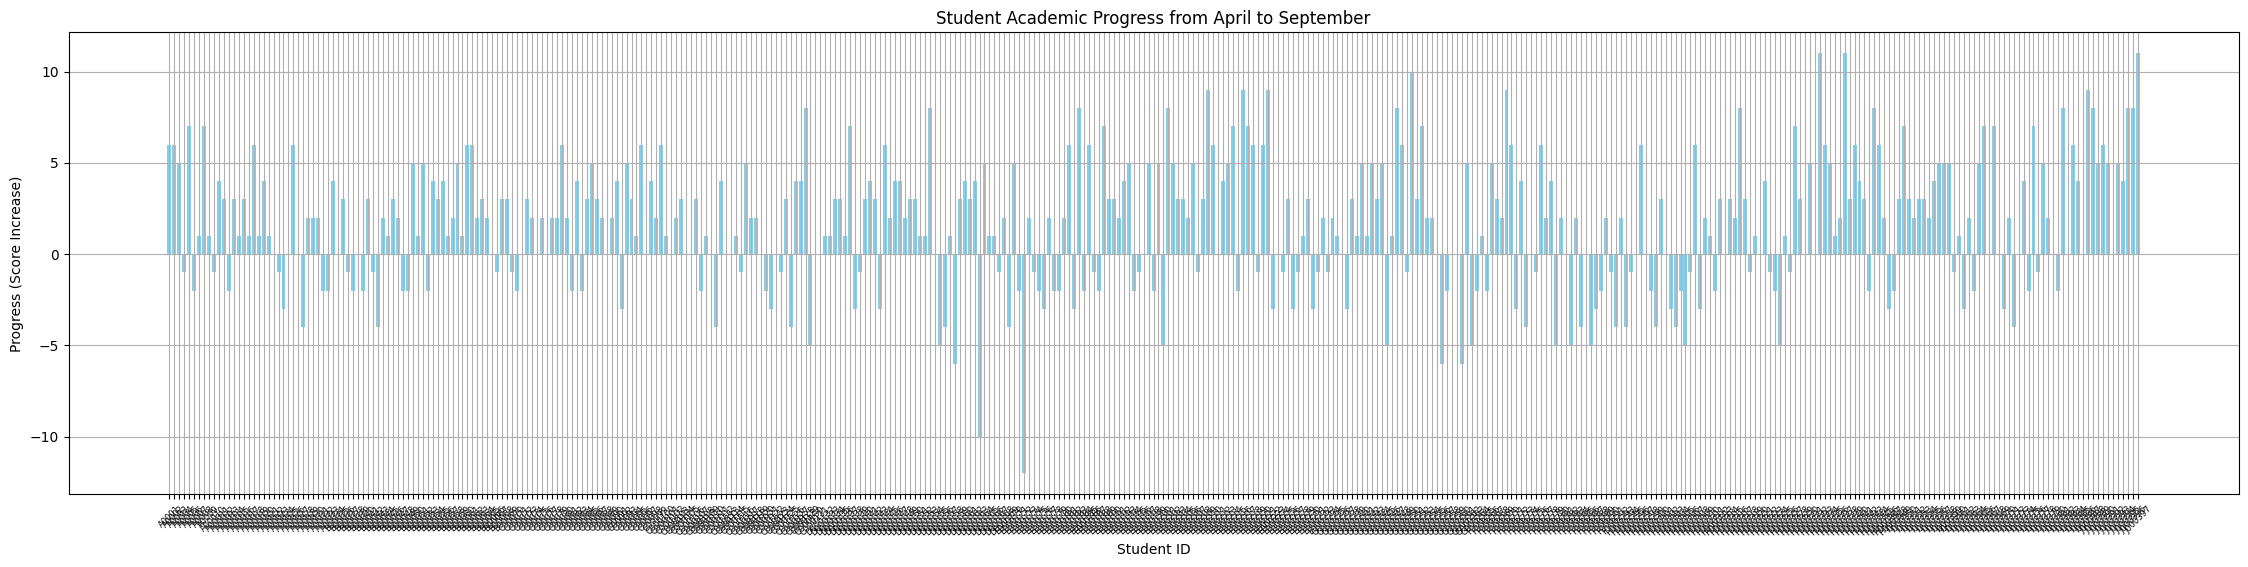

In [52]:
# Visualization of Individual Student Progress
plt.figure(figsize=(28, 6))
plt.bar(data['Student ID'], data['Progress_April_to_September'], color='skyblue')
plt.title('Student Academic Progress from April to September')
plt.xlabel('Student ID')
plt.ylabel('Progress (Score Increase)')
plt.xticks(rotation=45, fontsize=6)
plt.grid(True)
plt.show()

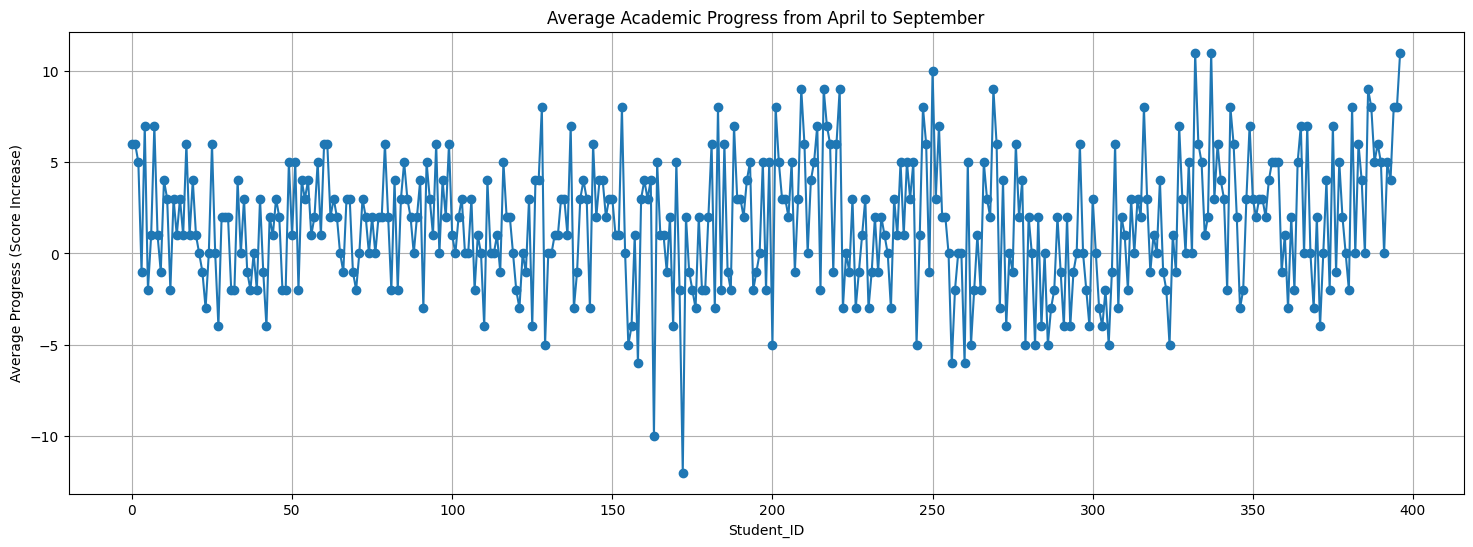

In [20]:
#Top-Performing and Struggling Students
top_performers = data.nlargest(5, 'Progress_April_to_September')
struggling_students = data.nsmallest(5, 'Progress_April_to_September')

In [21]:
# Top performers and struggling students
print("Top Performing Students:")
print(top_performers[['Student ID', 'Gender', 'Progress_April_to_September']])

print("\nStruggling Students:")
print(struggling_students[['Student ID', 'Gender', 'Progress_April_to_September']])

Top Performing Students:
    Student ID Gender  Progress_April_to_September
332    H000333   Girl                           11
337    H000338   Girl                           11
396    J000397    Boy                           11
250    G000251    Boy                           10
209    E000210   Girl                            9

Struggling Students:
    Student ID Gender  Progress_April_to_September
172    E000173    Boy                          -12
163    D000164    Boy                          -10
158    D000159    Boy                           -6
256    G000257   Girl                           -6
260    G000261   Girl                           -6


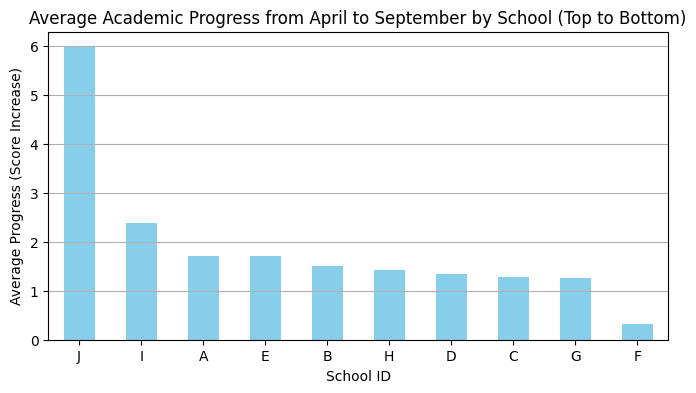

In [67]:
# Group Data by School and Calculate Average Progress
school_progress = data.groupby('school')['Progress_April_to_September'].mean()

# Sort the schools by progress in descending order
school_progress = school_progress.sort_values(ascending=False)

# Visualize School-Based Progress from top to bottom
plt.figure(figsize=(8, 4))
school_progress.plot(kind='bar', color='skyblue')
plt.title('Average Academic Progress from April to September by School (Top to Bottom)')
plt.xlabel('School ID')
plt.ylabel('Average Progress (Score Increase)')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

In [68]:
# Schools with High and Low Progress
top_performing_school = school_progress.iloc[0]
low_performing_school = school_progress.iloc[-1]

In [69]:
print("Top-Performing School:")
print(top_performing_school)

Top-Performing School:
6.0


In [161]:
print("\nLow-Performing School:")
print(low_performing_school)



Low-Performing School:
0.32142857142857145


<ipython-input-71-9cd7f8465a23>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_progress_by_school = data.groupby(['school']).mean().loc[:, 'April_MT':'September_MT']


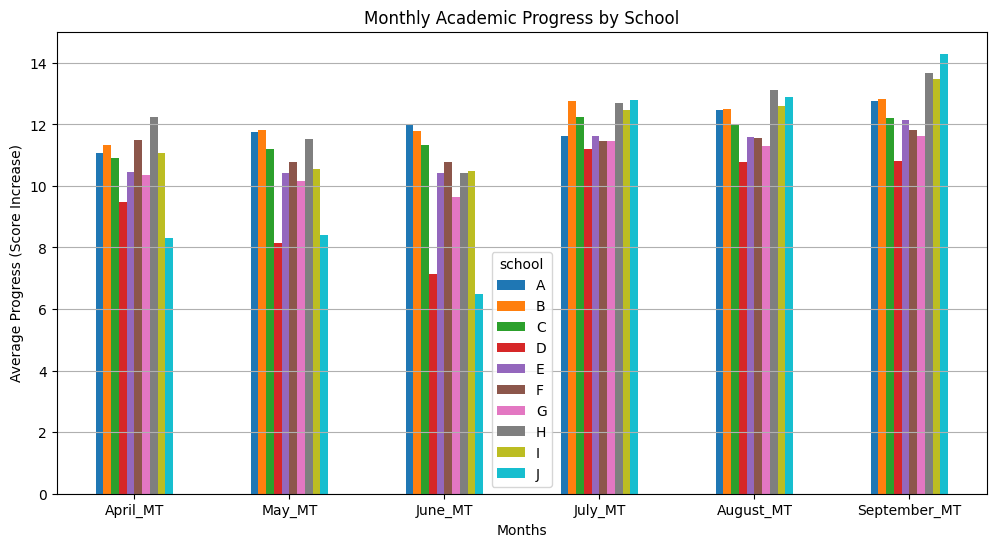

In [71]:
# Bar Plot (Schools by Month)
monthly_progress_by_school = data.groupby(['school']).mean().loc[:, 'April_MT':'September_MT']
monthly_progress_by_school.T.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Academic Progress by School')
plt.xlabel('Months')
plt.ylabel('Average Progress (Score Increase)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

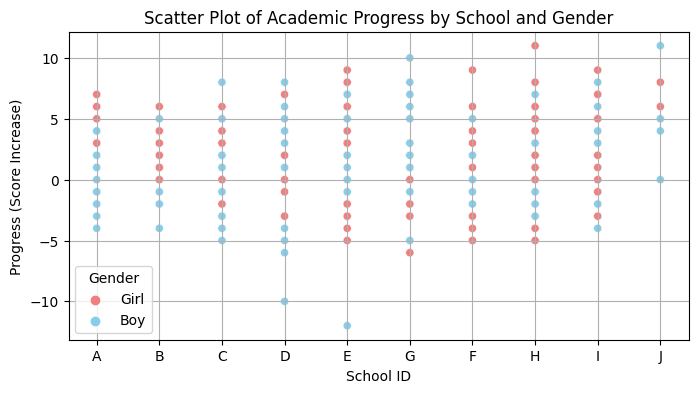

In [77]:
# Scatter Plot (Schools by Gender)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='school', y='Progress_April_to_September', hue='Gender', data=data, palette=['lightcoral', 'skyblue'])
plt.title('Scatter Plot of Academic Progress by School and Gender')
plt.xlabel('School ID')
plt.ylabel('Progress (Score Increase)')
plt.grid(True)
plt.show()

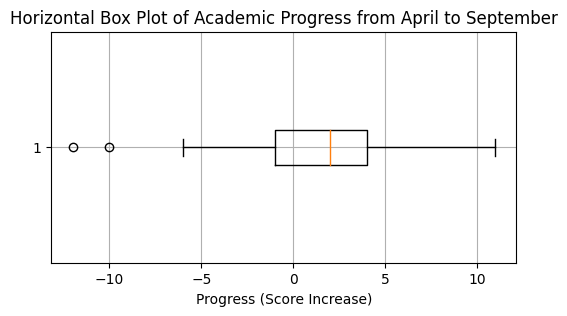

In [49]:
# Box Plot Progress_April_to_September
plt.figure(figsize=(6, 3))
plt.boxplot(data['Progress_April_to_September'], vert=False)
plt.title('Horizontal Box Plot of Academic Progress from April to September')
plt.xlabel('Progress (Score Increase)')
plt.grid(True)
plt.show()

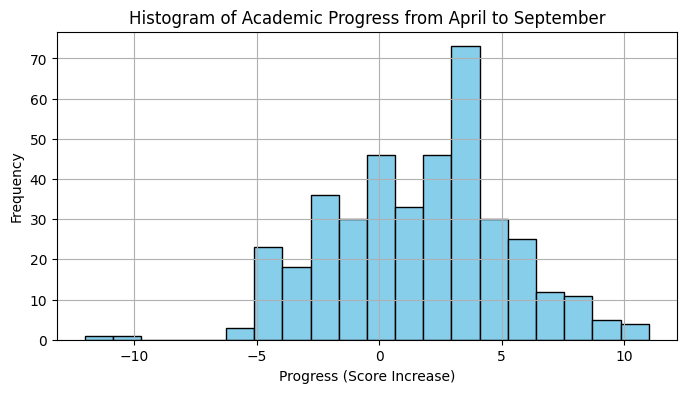

In [48]:
# Histogram Progress_April_to_September
plt.figure(figsize=(8, 4))
plt.hist(data['Progress_April_to_September'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Academic Progress from April to September')
plt.xlabel('Progress (Score Increase)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

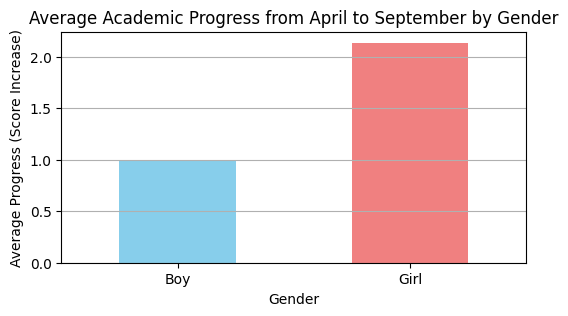

In [51]:
# Group Data by Gender and Calculate Average Progress
gender_progress = data.groupby('Gender')['Progress_April_to_September'].mean()

# Visualize Gender-Based Progress
plt.figure(figsize=(6, 3))
gender_progress.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Academic Progress from April to September by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Progress (Score Increase)')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

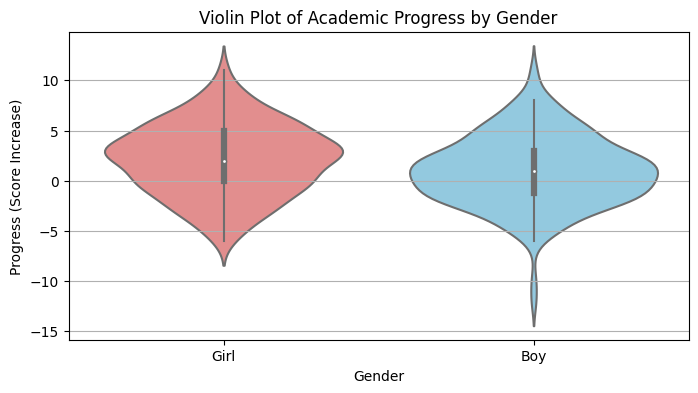

In [61]:
# Violin Plot
plt.figure(figsize=(8, 4))
sns.violinplot(x='Gender', y='Progress_April_to_September', data=data, palette=['lightcoral', 'skyblue'])
plt.title('Violin Plot of Academic Progress by Gender')
plt.xlabel('Gender')
plt.ylabel('Progress (Score Increase)')
plt.grid(axis='y')
plt.show()

<ipython-input-60-1053d6edfa3f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_progress_by_gender = data.groupby(['Gender']).mean().loc[:, 'April_MT':'September_MT']


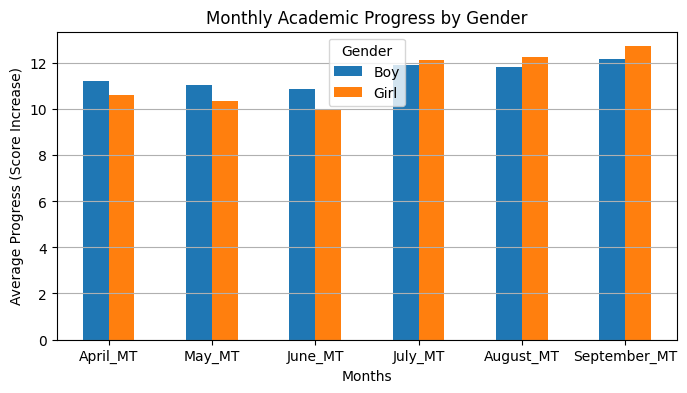

In [60]:
# Grouped Bar Plot
monthly_progress_by_gender = data.groupby(['Gender']).mean().loc[:, 'April_MT':'September_MT']
monthly_progress_by_gender.T.plot(kind='bar', figsize=(8, 4))
plt.title('Monthly Academic Progress by Gender')
plt.xlabel('Months')
plt.ylabel('Average Progress (Score Increase)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# **2.  Calculate applicable statistical measures for student performance at each time point.**

In [83]:
# Summary statistics for each month
monthly_summary = data.iloc[:, 3:].describe().T
monthly_summary

,count,mean,std,min,25%,50%,75%,max
April_MT,397.0,10.881612,3.333120,3.00,8.00,11.00,13.0,19.00
May_MT,397.0,10.687657,3.770322,0.00,9.00,11.00,13.0,19.00
June_MT,397.0,10.377834,4.604928,0.00,8.00,11.00,14.0,20.00
July_MT,397.0,12.015113,2.422490,0.00,10.00,12.00,14.0,18.00
August_MT,397.0,12.045340,2.420026,6.00,10.00,12.00,13.0,19.00
September_MT,397.0,12.473552,2.607764,0.00,11.00,12.00,14.0,19.00
Average_Score,397.0,11.413526,2.473879,5.83,9.67,11.33,13.0,18.17
Progress_April_to_September,397.0,1.591940,3.555439,-12.00,-1.00,2.00,4.0,11.00


In [162]:
# Function to calculate statistics for a given series
def calculate_monthly_statistics(series):
    statistics = {
        "Mean score": series.mean(),
        "Median score": series.median(),
        "Mode score": series.mode().values[0] if not series.mode().empty else None,  # Get the first mode (if it exists)
        "Standard deviation": series.std(),
        "Variance": series.var(),
        "Skewness": series.skew(),
        "Kurtosis": series.kurtosis(),
        "Coefficient of Variation (CV)": series.std() / series.mean(),
        "Range": series.max() - series.min()
    }
    return statistics

# statistics for each month
months = ['April_MT', 'May_MT', 'June_MT', 'July_MT', 'August_MT', 'September_MT']
monthly_statistics = []

for month in months:
    monthly_data = data[month]
    statistics = calculate_monthly_statistics(monthly_data)
    monthly_statistics.append(statistics)

# DataFrame from the calculated statistics
monthly_statistics_df = pd.DataFrame(monthly_statistics, index=months)

monthly_statistics_df

,Mean score,Median score,Mode score,Standard deviation,Variance,Skewness,Kurtosis,Coefficient of Variation (CV),Range
April_MT,10.881612,11.0,10,3.333120,11.109686,0.238806,-0.699270,0.306308,16
May_MT,10.687657,11.0,9,3.770322,14.215327,-0.419237,0.582941,0.352773,19
June_MT,10.377834,11.0,10,4.604928,21.205366,-0.724999,0.362051,0.443727,20
July_MT,12.015113,12.0,11,2.422490,5.868458,-0.071299,0.918044,0.201620,18
August_MT,12.045340,12.0,12,2.420026,5.856525,0.300223,-0.168099,0.200910,13
September_MT,12.473552,12.0,11,2.607764,6.800435,-0.352348,1.547382,0.209064,19


# **3.Create visualizations to illustrate the learning progress and trends at student or school level.**

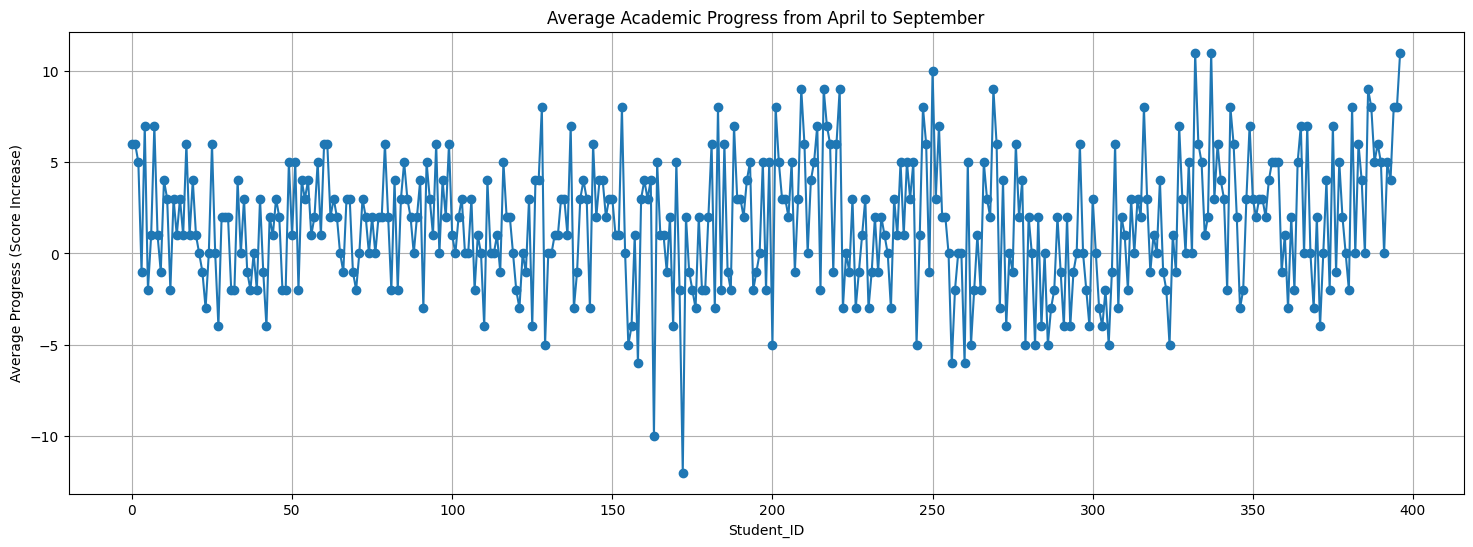

In [163]:
# line graph for Progress_April_to_September
plt.figure(figsize=(18, 6))
plt.plot(data['Progress_April_to_September'], marker='o', linestyle='-')
plt.title('Average Academic Progress from April to September')
plt.xlabel('Student_ID')
plt.ylabel('Average Progress (Score Increase)')
plt.grid(True)
plt.show()

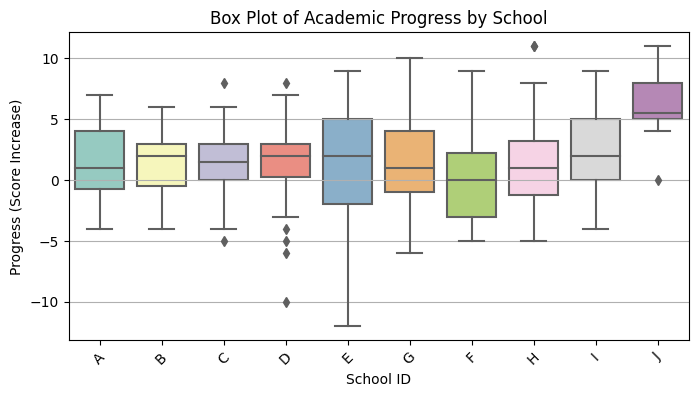

In [97]:
# Box Plot by School
plt.figure(figsize=(8, 4))
sns.boxplot(x='school', y='Progress_April_to_September', data=data, palette='Set3')
plt.title('Box Plot of Academic Progress by School')
plt.xlabel('School ID')
plt.ylabel('Progress (Score Increase)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

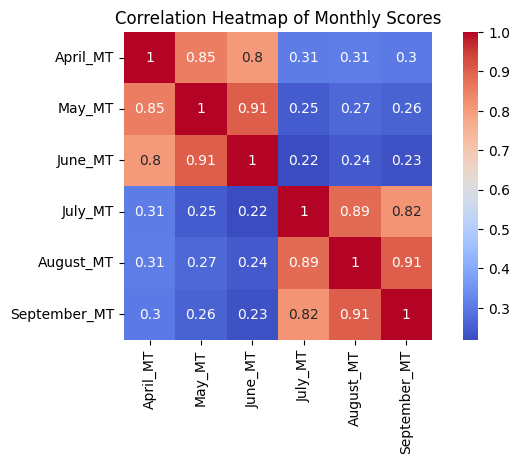

In [107]:
# Correlation Heatmap
correlation_matrix = data.loc[:, 'April_MT':'September_MT'].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Monthly Scores')
plt.show()

#**4. Apply relevant statistical tools to model the growth trajectories of students over time.**

In [108]:
# Select a student for modeling (change the student ID as needed)
student_id = 'A0001'  #Change as required
student_data = data[data['Student ID'] == student_id]

In [111]:
# Extract the time (months) as numerical values
months = np.arange(1, 7)

# Reshape the data for regression
X = months.reshape(-1, 1)
y = student_data.loc[:, 'April_MT':'September_MT'].values.T  # Transpose the data

In [112]:
from sklearn.linear_model import LinearRegression
# Create and train linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [113]:
# Predict the trajectory for the next months
next_months = np.arange(7, 13).reshape(-1, 1)
predicted_scores = model.predict(next_months)

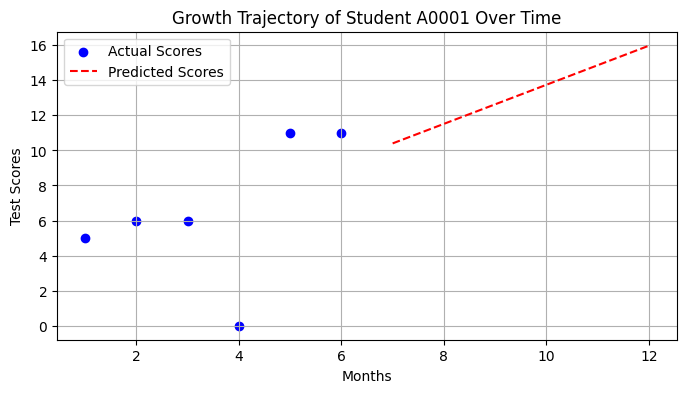

In [115]:
# Plot the actual and predicted trajectory
plt.figure(figsize=(8, 4))
plt.scatter(X, y, label='Actual Scores', marker='o', color='blue')
plt.plot(next_months, predicted_scores, label='Predicted Scores', linestyle='--', color='red')
plt.title(f'Growth Trajectory of Student {student_id} Over Time')
plt.xlabel('Months')
plt.ylabel('Test Scores')
plt.legend()
plt.grid(True)
plt.show()

# **5. Generate a monthly report for July, summarizing the learning growth trends of students, along with insights and recommendations on the learning gap.**

In [121]:
july_data = data['July_MT']
july_data

0       0
1       9
2      12
3      14
4      11
       ..
392    12
393    14
394    14
395    12
396    16
Name: July_MT, Length: 397, dtype: int64

In [120]:
average_july_achievement = july_data.mean()
average_july_achievement

12.015113350125944

In [124]:
below_average_students = july_data < average_july_achievement
below_average_students

0       True
1       True
2       True
3      False
4       True
       ...  
392     True
393    False
394    False
395     True
396    False
Name: July_MT, Length: 397, dtype: bool

Text(0.5, 1.0, 'Visualize below-average students for July')

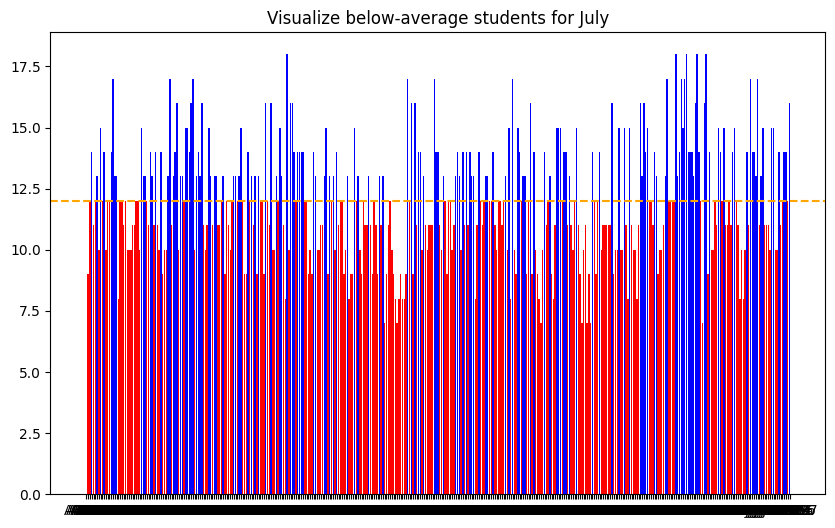

In [151]:
#bar chart to visualize below-average students
plt.figure(figsize=(10, 6))
plt.bar(data['Student ID'], july_data, color='blue', label='Student Scores')
plt.bar(data['Student ID'][below_average_students], july_data[below_average_students], color='red', label='Below Average Scores')
plt.axhline(average_july_achievement, color='orange', linestyle='--', label='Average Score')
plt.title("Visualize below-average students for July")

In [128]:
average_growth_rate = july_data.pct_change().mean()
falling_behind_students = july_data.pct_change() < average_growth_rate
falling_behind_students

0      False
1      False
2       True
3       True
4       True
       ...  
392     True
393     True
394     True
395     True
396     True
Name: July_MT, Length: 397, dtype: bool

Text(0.5, 1.0, ' Not falling behind the average growth students for july month')

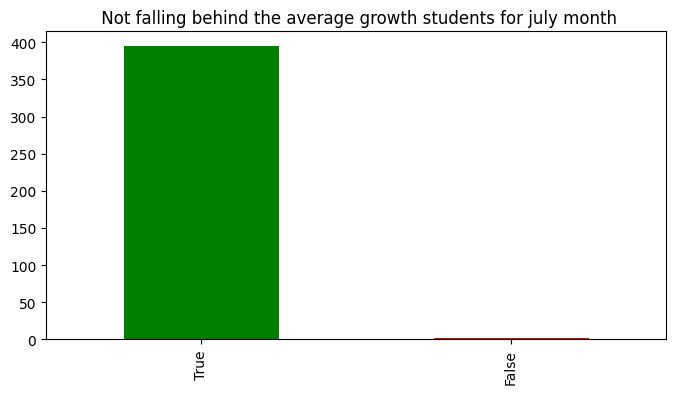

In [165]:
# bar chart to visualize falling behind students
plt.figure(figsize=(8,4))
falling_behind_students.value_counts().plot(kind='bar', color=['green', 'red'])
plt.title(" Not falling behind the average growth students for july month")


In [138]:
# Calculate summary statistics for July
average_score = july_data.mean()
max_score = july_data.max()
min_score = july_data.min()
score_range = max_score - min_score
print("average_score: ", average_score)
print("max_score: ", max_score)
print("min_score: ", min_score)
print("score_range: ", score_range)

average_score:  12.015113350125944
max_score:  18
min_score:  0
score_range:  18


In [135]:
# Define a passing score threshold
passing_score = 5  # You can adjust this threshold based on your criteria

# Count the number of students who passed in July
passing_students = july_data[july_data >= passing_score]
num_passing_students = len(passing_students)
num_passing_students

396

In [144]:
# Calculate the percentage of students who passed in July
passing_percentage = (num_passing_students / len(july_data)) * 100
print("passing_percentage: ", round(passing_percentage,2),"%")

passing_percentage:  99.75 %


(-1.023906455861196,
 1.1760932666916397,
 -1.1648828014331194,
 1.0351169503485544)

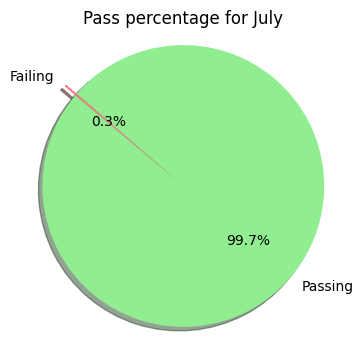

In [159]:
# Create a pie chart to visualize passing and failing students
labels = ['Passing', 'Failing']
sizes = [passing_percentage, 100 - passing_percentage]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pass percentage for July")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.


In [147]:
# Generate the report
report = f"Monthly Report: July 2023\n\n"

# Summary of July scores
report += "Learning Growth Trends in July:\n"
report += f"- Average Score: {average_score:.2f}\n"
report += f"- Highest Score: {max_score}\n"
report += f"- Lowest Score: {min_score}\n"
report += f"- Score Range: {score_range}\n\n"

# Insights
report += "Insights:\n"
if passing_percentage >= 70:
    report += "- A significant percentage of students passed in July, which is a positive sign of learning growth.\n"
else:
    report += "- While there is progress, there's room for improvement in student performance.\n"

# Recommendations
report += "Recommendations:\n"
if passing_percentage < 50:
    report += "- Implement targeted interventions and additional support for students who are struggling.\n"
report += "- Continue to monitor student performance monthly to identify trends and areas that need improvement.\n"

# Print the report
print(report)

Monthly Report: July 2023

Learning Growth Trends in July:
- Average Score: 12.02
- Highest Score: 18
- Lowest Score: 0
- Score Range: 18

Insights:
- A significant percentage of students passed in July, which is a positive sign of learning growth.
Recommendations:
- Continue to monitor student performance monthly to identify trends and areas that need improvement.

